In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [5]:
train = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')
test = pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


# Check the target column

In [8]:
for column in train.columns:
    if column not in test.columns:
        print(column)

TARGET


In [9]:
print(train['TARGET'].value_counts())
print(f"Satisfaction Rate: {train['TARGET'].value_counts().iloc[0] / train['TARGET'].count() * 100:.4}%")

TARGET
0    73012
1     3008
Name: count, dtype: int64
Satisfaction Rate: 96.04%


# Preprocess

In [10]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## Outliar Processing

 * train['var3']에서 -999999 Outliar 발견 > 가능하다면 최빈값으로 대체

In [11]:
train['var3'].replace(-999999, 2, inplace=True)

In [12]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## Train Data Split

### Remove 'ID' column from train data

* train dataset에서 ID 칼럼 분리 > 나중에 Pridict 할 때 사용

In [13]:
customer_ID = train['ID']
train.drop('ID', axis=1, inplace=True) #train dataset에서 ID를 제거하고, X, y(TARGET)으로 구성
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


### Split train data

* Train Data > Tain & Test data
* X_Train:X_Test = y_train:y_test = 4:1

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, :-1], train.iloc[:, -1], 
                                                    test_size=0.2, random_state=0) # Train:Test = 4:1

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)


In [15]:
train_cnt = y_train.count()
test_cnt = y_test.count()
print(train_cnt,test_cnt)
print(y_train.value_counts(), y_test.value_counts())
print('학습 세트 레이블 값 분포 비율: (%)')
print(round(y_train.value_counts() / train_cnt * 100, 2))
print('테스트 세트 레이블 값 분포 비율: (%)')
print(round(y_test.value_counts() / test_cnt * 100, 2))

60816 15204
TARGET
0    58442
1     2374
Name: count, dtype: int64 TARGET
0    14570
1      634
Name: count, dtype: int64
학습 세트 레이블 값 분포 비율: (%)
TARGET
0    96.1
1     3.9
Name: count, dtype: float64
테스트 세트 레이블 값 분포 비율: (%)
TARGET
0    95.83
1     4.17
Name: count, dtype: float64


## Train Data Subsplit

* Data Preparation for early_stopping Validation in XGBoost Model
* Trainning Data Set >  X_Tr, X_val
* X_tr:X_val = y_tr:y_val = 7:3

In [16]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.3, random_state=0) # Train.train:Train.test = 7:3
print('하위 학습 세트 Shape:{0}, 하위 검증 세트 Shape:{1}'.format(X_tr.shape , X_val.shape))

하위 학습 세트 Shape:(42571, 369), 하위 검증 세트 Shape:(18245, 369)


In [17]:
X_tr.shape[0] + X_val.shape[0] == X_train.shape[0] #size check

True

# XGBoost Model

## Hyperparameter Setting

* n_estimators = 500
* learning_rate = 0.05
* early_stopping_rounds = 100
* eval_metric = 'auc'

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Medel Setting 
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156, 
                        early_stopping_rounds = 100, eval_metric = 'auc')

# Fit Trainning Data 
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], verbose = False)

#Model Evaluation
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC_AUC_Score: {0:.4f}'.format(xgb_roc_score))

ROC_AUC_Score: 0.8417


## Parameter Tunning

### Search Space Definition

* max_depth: range = 5~15, interval = 1
* min_child_weight: range = 1~6, interval = 1
* colsample_bytree: 0.5 ~ 0.95
* learning_rate: 0.01~0.2, Normal Distribution

In [19]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

## Cross-validation using Kfold

* Using KFold to extract train and validation data
* Execute n times( n = number of cross-validation)

### Define Objective Function

Reduce runtime by setting lower values to the hyperparameters
* estimators = 100
* early_stopping_rounds = 30

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, 
                            early_stopping_rounds = 30, 
                            eval_metric = 'auc',
                            max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate = search_space['learning_rate']
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits = 3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, 
                    eval_set=[(X_tr, y_tr), (X_val, y_val)],
                    verbose = False
                   )
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [21]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,
            max_evals = 50, # 최대 반복 횟수를 지정합니다.
            trials = trials, 
            rstate = np.random.default_rng(seed=30)
           )

print('best:', best)

100%|██████████| 50/50 [17:21<00:00, 20.83s/trial, best loss: -0.8382516761288219]
best: {'colsample_bytree': 0.6848964687546426, 'learning_rate': 0.0709453695953271, 'max_depth': 6.0, 'min_child_weight': 5.0}


### Parameter Optimaization

In [23]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(
                        n_estimators = 500, 
                        learning_rate = round(best['learning_rate'], 5),
                        max_depth = int(best['max_depth']), 
                        min_child_weight = int(best['min_child_weight']), 
                        colsample_bytree = round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, 
            early_stopping_rounds = 100, 
            eval_metric = "auc",
            eval_set = [(X_tr, y_tr), (X_val, y_val)],
            verbose = False
           )

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8465


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

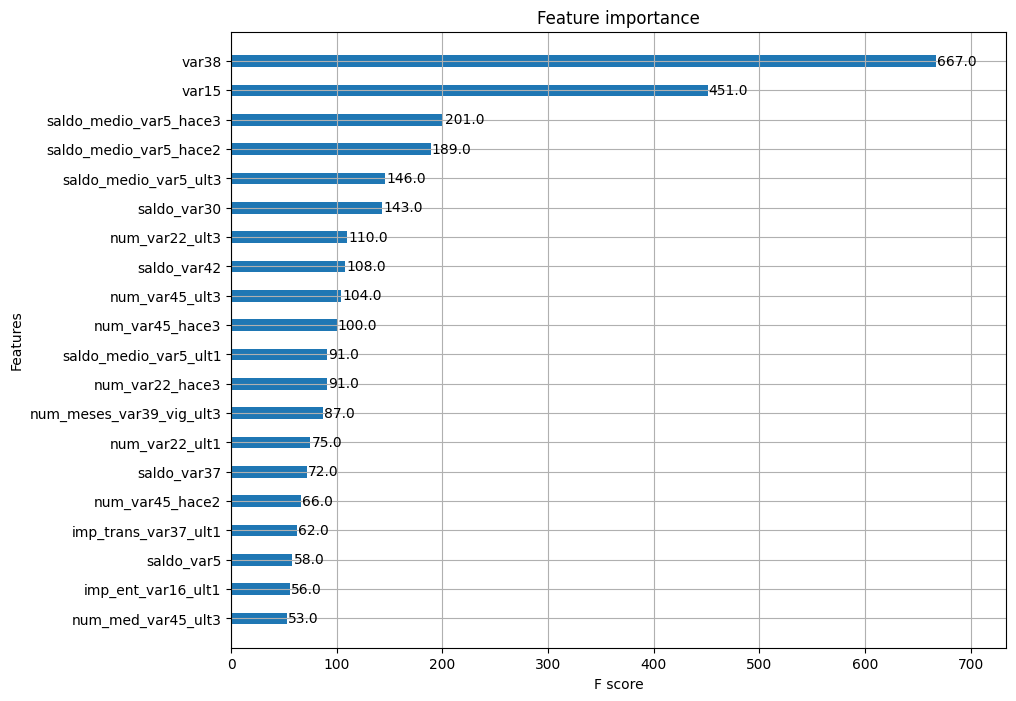

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# LightGBM Model

## Hyperparameter Setting

* n_estimators = 500, 
* early_stopping_rounds = 100,

In [30]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
                            n_estimators = 500, 
                            early_stopping_rounds = 100,
                            verbose = -1,
                            random_state = 123
                         )

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_metric = "auc", eval_set = eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8384


## Parameter Tunning

### Search Space Definition

* num_leaves: range = 32~64, interval = 1
* max_depth: range = 100~160, interval = 1
* min_child_weight: range = 60~100, interval = 1
* subsample: range = 0.7~1
* learning_rate: range = 0.01~0.2

In [29]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

## Cross-validation using Kfold

* Using KFold to extract train and validation data
* Execute n times( n = number of cross-validation)

### Define Objective Function

Reduce runtime by setting lower values to the hyperparameters
* n_estimators = 100
* early_stopping_rounds = 30

In [34]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators = 100, 
                               num_leaves = int(search_space['num_leaves']),
                               max_depth = int(search_space['max_depth']),
                               min_child_samples = int(search_space['min_child_samples']), 
                               subsample = search_space['subsample'],
                               early_stopping_rounds = 30,
                               learning_rate = search_space['learning_rate'],
                               verbose = -1
                              )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits = 3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, eval_metric = "auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [35]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn = objective_func, 
            space = lgbm_search_space, 
            algo = tpe.suggest,
            max_evals = 50, # 최대 반복 횟수를 지정합니다.
            trials = trials, 
            rstate = np.random.default_rng(seed=30)
           )

print('best:', best)

100%|██████████| 50/50 [04:03<00:00,  4.88s/trial, best loss: -0.8362219933743917]
best: {'learning_rate': 0.04589753644367517, 'max_depth': 119.0, 'min_child_samples': 69.0, 'num_leaves': 33.0, 'subsample': 0.9332360463629378}


In [41]:
for key, value in best.items():
    print(f"{key}:\t {value:.2}")

learning_rate:	 0.046
max_depth:	 1.2e+02
min_child_samples:	 6.9e+01
num_leaves:	 3.3e+01
subsample:	 0.93


### Hyperparameter Optimization

In [37]:
lgbm_clf =  LGBMClassifier(n_estimators = 500, 
                           num_leaves = int(best['num_leaves']),
                           max_depth = int(best['max_depth']),
                           min_child_samples = int(best['min_child_samples']), 
                           subsample = round(best['subsample'], 5),
                           learning_rate = round(best['learning_rate'], 5),
                           early_stopping_rounds = 100,
                           verbose = -1
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr,  
             eval_metric = "auc",
             eval_set = [(X_tr, y_tr), (X_val, y_val)]
            )

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8412
